In [84]:
# Impor the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [85]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size =1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [86]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [87]:
# Unzip-Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-26.56231372702743 68.71810455575701
75.46254367160702 -172.74881488593715
51.515856239979485 -16.1298634547839
-22.349783662361048 17.531051534912564
8.976459863546978 166.23291308586136
-14.424278572978338 96.59266304628358
12.64211396781208 129.39461433711904
-27.019677178528397 29.458209815242867
-18.4829829546603 58.76142796856638
-76.24968091011984 59.981396356321
-81.2768956939507 28.49654315254574
-78.0041930450165 45.54331878063476
20.472277921398472 29.40724344384975
-39.689587795284204 -104.05302960837788
6.6876937612882585 -28.854497548383762
30.997901760834935 31.620720590200676
32.292139954012455 -27.655450124873624
-37.25674907395047 70.71639622855326
67.15207019913427 -67.55894550985164
39.35096772548002 -109.37282818324631
-18.62520744056009 -49.4758042783551
-11.312027882009986 -25.36171617372605
-82.60827383581535 -124.58435160307567
-16.10503729167877 60.31619355526681
-79.00744492894815 -152.36164361629108
-51.856362734288716 89.64009507653469
55.03907823658682 -61

-84.52265000942745 55.08626571609909
1.8006052835659432 88.16506973951095
-50.432789058813 83.49008354203085
33.322139061609505 -172.8246192828319
23.973836663676238 -79.55397938761348
46.76750724573617 158.2273874976513
67.00596055298556 -147.6228568014801
6.919984019559237 -162.83022491288418
-81.58150977609046 86.86332192051594
4.3516522401034905 -9.607165077474008
-85.06731167069013 60.73642719629598
73.77792752587669 52.74719416063692
29.769518954563466 7.033581120492244
-22.818306240803324 -42.64674979417072
57.7550613643628 20.22871444435907
41.981438037522 -93.68126882556115
-87.37072790470137 -102.97295592251255
-82.82795614859342 124.59673758335327
8.750483752280289 -108.33257322793767
43.93197452688119 -106.97115816413533
-81.415478530651 125.01736469227438
-87.5398378445732 64.31448126628189
-16.44373362849923 -43.01709457505012
-25.765363917891435 -56.2343993296311
88.83711984993062 34.6783121225283
-63.9060637271139 -155.1597964921805
-77.18005045904688 120.73870444154232

35.83899046334659 115.15230074447697
-14.626992691271113 -36.151761020463255
-24.790243876223755 68.98352443877005
-25.582206854634023 -11.68390220485378
-1.3144137745640307 -137.16413783804205
47.389253171406835 -135.94222829538268
75.43811645327949 93.2349903380894
45.432262899077074 -8.280525726269559
58.38874860036751 32.31283729668209
-63.50736470961275 -90.79710711294526
-17.922047646828105 113.9083004122648
-42.34697867149163 -46.553112413798885
-52.49172739822219 -79.67888102900368
-48.00415971499213 131.01518850034938
35.67993473398123 -161.52276958877155
-5.310661740530634 -68.16989952104676
-24.148474740845543 136.53397798275682
-38.00126350207415 7.650990465264755
-25.652376925943926 -13.766787383013963
56.32661748340428 66.74262231500944
30.269173267471544 122.0947916557663
-60.19614425824736 39.55723358018702
-35.65264844362962 133.71687329342393
-47.135275600704354 30.38542157995883
-16.06291546756225 15.506876942819758
-30.412777153913495 98.49879629717498
13.3210902880

In [88]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [89]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

636

In [90]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [91]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [92]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [93]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | bambous virieux
Processing Record 2 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 13 | dingle
Processing Record 4 of Set 13 | windhoek
Processing Record 5 of Set 13 | butaritari
Processing Record 6 of Set 13 | bengkulu
Processing Record 7 of Set 13 | san policarpo
Processing Record 8 of Set 13 | standerton
Processing Record 9 of Set 13 | grand gaube
Processing Record 10 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 13 | kruisfontein
Processing Record 12 of Set 13 | port alfred
Processing Record 13 of Set 13 | marawi
Processing Record 14 of Set 13 | ancud
Processing Record 15 of Set 13 | sao filipe
Processing Record 16 of Set 13 | dekernes
Processing Record 17 of Set 13 | ponta delgada
Processing Record 18 of Set 13 | mahebourg
Processing Record 19 of Set 13 | pangnirtung
Processing Record 20 of Set 13 | redlands
Processing Record 2

Processing Record 37 of Set 16 | aguimes
Processing Record 38 of Set 16 | saint-philippe
Processing Record 39 of Set 16 | mar del plata
Processing Record 40 of Set 16 | zhigansk
Processing Record 41 of Set 16 | chuy
Processing Record 42 of Set 16 | puerto madryn
Processing Record 43 of Set 16 | cherskiy
Processing Record 44 of Set 16 | yanam
Processing Record 45 of Set 16 | adamas
Processing Record 46 of Set 16 | yaring
Processing Record 47 of Set 16 | porto santo
Processing Record 48 of Set 16 | vardo
Processing Record 49 of Set 16 | collipulli
Processing Record 50 of Set 16 | sacama
Processing Record 1 of Set 17 | richards bay
Processing Record 2 of Set 17 | iqaluit
Processing Record 3 of Set 17 | warqla
City not found. Skipping...
Processing Record 4 of Set 17 | marcona
City not found. Skipping...
Processing Record 5 of Set 17 | coquimbo
Processing Record 6 of Set 17 | daxian
City not found. Skipping...
Processing Record 7 of Set 17 | viedma
Processing Record 8 of Set 17 | le port
P

Processing Record 20 of Set 20 | tura
Processing Record 21 of Set 20 | khonsa
Processing Record 22 of Set 20 | fairbanks
Processing Record 23 of Set 20 | inhambane
Processing Record 24 of Set 20 | cap malheureux
Processing Record 25 of Set 20 | sobolevo
Processing Record 26 of Set 20 | puerto colombia
Processing Record 27 of Set 20 | alofi
Processing Record 28 of Set 20 | merrill
Processing Record 29 of Set 20 | soyo
Processing Record 30 of Set 20 | sagua la grande
Processing Record 31 of Set 20 | college
Processing Record 32 of Set 20 | buchanan
Processing Record 33 of Set 20 | rio bonito
Processing Record 34 of Set 20 | pavilosta
Processing Record 35 of Set 20 | ames
Processing Record 36 of Set 20 | sheridan
Processing Record 37 of Set 20 | grao mogol
Processing Record 38 of Set 20 | independencia
Processing Record 39 of Set 20 | kahului
Processing Record 40 of Set 20 | cassilandia
Processing Record 41 of Set 20 | lazaro cardenas
Processing Record 42 of Set 20 | korla
Processing Reco

Processing Record 4 of Set 24 | phayuha khiri
Processing Record 5 of Set 24 | bargal
City not found. Skipping...
Processing Record 6 of Set 24 | ola
Processing Record 7 of Set 24 | pozo colorado
Processing Record 8 of Set 24 | saint anthony
Processing Record 9 of Set 24 | guamal
Processing Record 10 of Set 24 | olafsvik
Processing Record 11 of Set 24 | kyzyl-suu
Processing Record 12 of Set 24 | bonavista
Processing Record 13 of Set 24 | touros
Processing Record 14 of Set 24 | kisarawe
Processing Record 15 of Set 24 | calama
Processing Record 16 of Set 24 | kautokeino
Processing Record 17 of Set 24 | mehamn
Processing Record 18 of Set 24 | baykit
Processing Record 19 of Set 24 | atambua
Processing Record 20 of Set 24 | tongzi
Processing Record 21 of Set 24 | mansa
Processing Record 22 of Set 24 | bom jardim
Processing Record 23 of Set 24 | dicabisagan
Processing Record 24 of Set 24 | getahovit
Processing Record 25 of Set 24 | shingu
Processing Record 26 of Set 24 | amarillo
Processing R

In [94]:
len(city_data)

585

In [95]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,82.65,74,20,6.91,MU,2022-02-12 14:49:54
1,Dingle,10.9995,122.6711,75.16,91,95,8.86,PH,2022-02-12 14:49:55
2,Windhoek,-22.5594,17.0832,74.10,56,100,1.01,NA,2022-02-12 14:49:55
3,Butaritari,3.0707,172.7902,81.72,79,43,16.35,KI,2022-02-12 14:49:56
4,Bengkulu,-3.8004,102.2655,77.61,85,100,5.08,ID,2022-02-12 14:49:56
5,San Policarpo,12.1791,125.5072,78.49,86,100,13.00,PH,2022-02-12 14:49:57
6,Standerton,-26.9337,29.2415,82.62,16,43,9.55,ZA,2022-02-12 14:49:57
7,Grand Gaube,-20.0064,57.6608,82.80,69,75,3.00,MU,2022-02-12 14:49:57
8,Kruisfontein,-34.0033,24.7314,80.17,65,39,16.53,ZA,2022-02-12 14:49:58
9,Port Alfred,-33.5906,26.8910,80.51,78,9,18.75,ZA,2022-02-12 14:49:59


In [96]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2022-02-12 14:49:54,-20.3428,57.7575,82.65,74,20,6.91
1,Dingle,PH,2022-02-12 14:49:55,10.9995,122.6711,75.16,91,95,8.86
2,Windhoek,NA,2022-02-12 14:49:55,-22.5594,17.0832,74.10,56,100,1.01
3,Butaritari,KI,2022-02-12 14:49:56,3.0707,172.7902,81.72,79,43,16.35
4,Bengkulu,ID,2022-02-12 14:49:56,-3.8004,102.2655,77.61,85,100,5.08
5,San Policarpo,PH,2022-02-12 14:49:57,12.1791,125.5072,78.49,86,100,13.00
6,Standerton,ZA,2022-02-12 14:49:57,-26.9337,29.2415,82.62,16,43,9.55
7,Grand Gaube,MU,2022-02-12 14:49:57,-20.0064,57.6608,82.80,69,75,3.00
8,Kruisfontein,ZA,2022-02-12 14:49:58,-34.0033,24.7314,80.17,65,39,16.53
9,Port Alfred,ZA,2022-02-12 14:49:59,-33.5906,26.8910,80.51,78,9,18.75


In [97]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [98]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

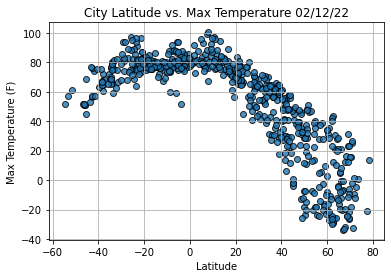

In [99]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

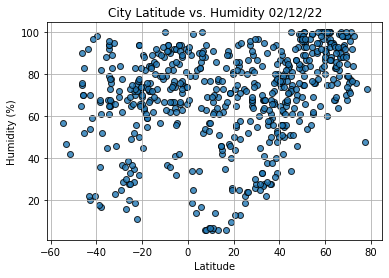

In [100]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

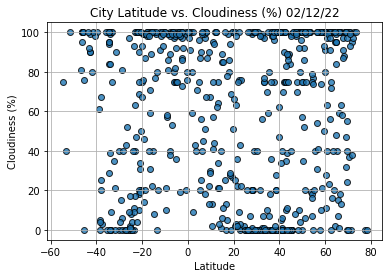

In [101]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

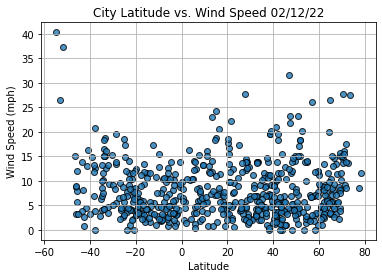

In [102]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [103]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [104]:
index13 = city_data_df.loc[13]
index13

City                     Dekernes
Country                        EG
Date          2022-02-12 14:50:00
Lat                       31.0876
Lng                        31.595
Max Temp                    62.49
Humidity                       60
Cloudiness                      0
Wind Speed                  11.25
Name: 13, dtype: object

In [105]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
580     True
581    False
582     True
583    False
584     True
Name: Lat, Length: 585, dtype: bool

In [106]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Dingle,PH,2022-02-12 14:49:55,10.9995,122.6711,75.16,91,95,8.86
3,Butaritari,KI,2022-02-12 14:49:56,3.0707,172.7902,81.72,79,43,16.35
5,San Policarpo,PH,2022-02-12 14:49:57,12.1791,125.5072,78.49,86,100,13.00
10,Marawi,PH,2022-02-12 14:49:59,7.9986,124.2928,67.64,94,100,1.74
12,Sao Filipe,CV,2022-02-12 14:50:00,14.8961,-24.4956,80.69,42,85,18.68


In [107]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

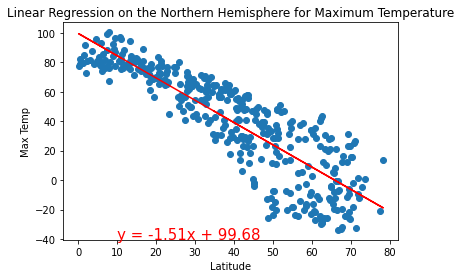

In [108]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-40))

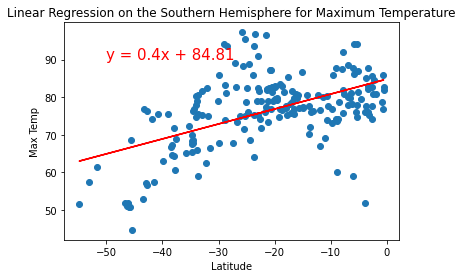

In [109]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

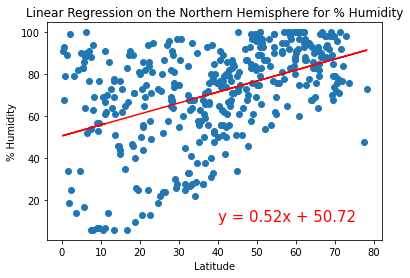

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

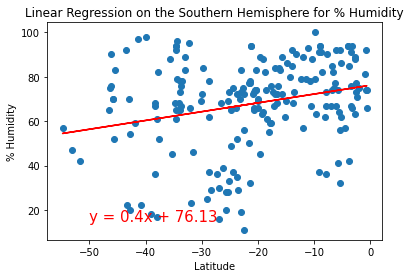

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

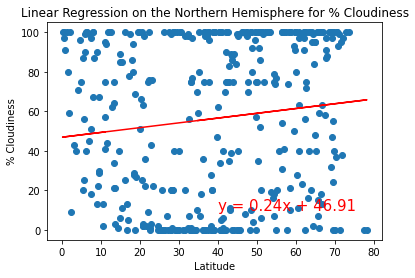

In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

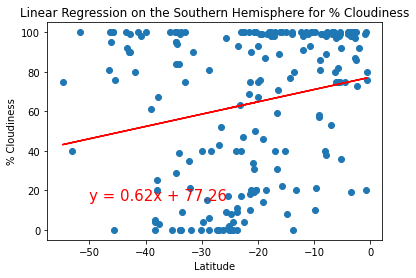

In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,15))

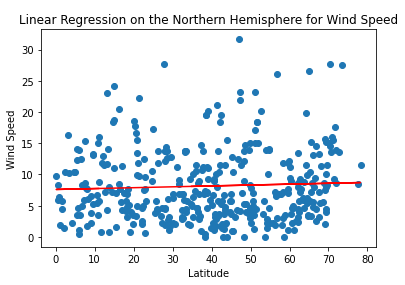

In [123]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

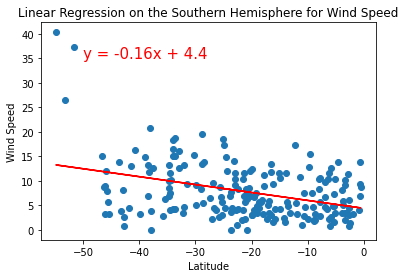

In [121]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))